Leer el dataset de entrenamiento 'actividad_dos_train.csv'

Importo las librerias numericas de visualizacion y de modelado

In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144
sns.set_theme()

In [2]:
from sklearn import datasets, linear_model, utils, preprocessing
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

In [3]:
#Leo fichero 'actividad_dos_train.csv' y lo vuelco sobre un dataframe de pandas
df = pd.read_csv('actividad_dos_train.csv')

In [4]:
df.head()

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,44.0,-0.948896,0.248414,2.956914,2.813750,0.145539,-0.027353,0.133702,-0.307535,...,-0.083647,0.416090,0.207537,0.716064,-0.602311,-0.064230,-0.315058,-0.272463,0.75,0
1,1,56.0,0.086996,-0.051989,-0.497882,-3.151908,2.558400,2.796671,0.470283,0.265333,...,-0.239426,-0.437342,0.018426,1.013038,-0.258927,-0.293189,-0.394956,-0.435996,10.84,0
2,2,125.0,-0.724910,0.073475,1.739547,0.758588,0.229543,2.422069,0.196688,0.861076,...,0.188696,0.738515,0.145933,-1.032186,-0.087511,-0.221063,0.108168,0.011785,113.00,0
3,3,140.0,1.175478,0.167881,0.509909,0.452332,-0.215763,-0.192104,-0.105404,0.068517,...,-0.176147,-0.500566,0.151263,0.018347,0.122003,0.106307,-0.014937,0.005771,1.29,0
4,4,196.0,1.198658,-0.420334,0.014599,-0.270793,-0.471074,-0.384610,-0.083890,-0.077570,...,-0.630206,-1.504432,0.193771,-0.017458,0.058387,0.145373,-0.034904,0.011037,63.90,0


In [5]:
df.set_index('index', inplace=True) #Establezco como indice la columna 'index'

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
index,,,,,,,,,,,,,,,,,,,,,
0,44.0,-0.948896,0.248414,2.956914,2.813750,0.145539,-0.027353,0.133702,-0.307535,-0.125244,...,-0.083647,0.416090,0.207537,0.716064,-0.602311,-0.064230,-0.315058,-0.272463,0.75,0
1,56.0,0.086996,-0.051989,-0.497882,-3.151908,2.558400,2.796671,0.470283,0.265333,0.919513,...,-0.239426,-0.437342,0.018426,1.013038,-0.258927,-0.293189,-0.394956,-0.435996,10.84,0
2,125.0,-0.724910,0.073475,1.739547,0.758588,0.229543,2.422069,0.196688,0.861076,0.099102,...,0.188696,0.738515,0.145933,-1.032186,-0.087511,-0.221063,0.108168,0.011785,113.00,0
3,140.0,1.175478,0.167881,0.509909,0.452332,-0.215763,-0.192104,-0.105404,0.068517,-0.249733,...,-0.176147,-0.500566,0.151263,0.018347,0.122003,0.106307,-0.014937,0.005771,1.29,0
4,196.0,1.198658,-0.420334,0.014599,-0.270793,-0.471074,-0.384610,-0.083890,-0.077570,-1.537508,...,-0.630206,-1.504432,0.193771,-0.017458,0.058387,0.145373,-0.034904,0.011037,63.90,0


Se trata de un dataset con datos asociados a los clientes del banco. Tenemos un total de 31 predictores y una variable objetivo llamada 'Class' que indica fraude (1) o no fraude (0). El probema a resolver es el de predicir si un cliente comete fraude o no en funcion de las caracteristicas dadas en el dataset. Se trata de un problema de clasificacion no balanceado (lo logico es que hayan muchos menos clientes fraudulentos que honestos). Lo comprobaremos numericamente. 
Los predictores son numericos. Para mas detalles, vamos a ver el 'info' y los posibles nulos 'isna' del dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8274 entries, 0 to 8273
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    8274 non-null   float64
 1   V1      8274 non-null   float64
 2   V2      8274 non-null   float64
 3   V3      8274 non-null   float64
 4   V4      8274 non-null   float64
 5   V5      8274 non-null   float64
 6   V6      8274 non-null   float64
 7   V7      8274 non-null   float64
 8   V8      8274 non-null   float64
 9   V9      8274 non-null   float64
 10  V10     8274 non-null   float64
 11  V11     8274 non-null   float64
 12  V12     8274 non-null   float64
 13  V13     8274 non-null   float64
 14  V14     8274 non-null   float64
 15  V15     8274 non-null   float64
 16  V16     8274 non-null   float64
 17  V17     8274 non-null   float64
 18  V18     8274 non-null   float64
 19  V19     8274 non-null   float64
 20  V20     8274 non-null   float64
 21  V21     8274 non-null   float64
 22  

In [8]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Vemos que no hay nulos (todos los predictores muestran 8274 entradas) y que son numericos (float). Es un dataset bastante limpio.
Vamos a estudiar estadisticos y correlaciones con nuestra variable objetivo

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,8274.000000,8274.000000,8274.000000,8274.000000,8274.000000,8274.000000,8274.000000,8274.000000,8274.000000,8274.000000,...,8274.000000,8274.000000,8274.000000,8274.000000,8274.000000,8274.000000,8274.000000,8274.000000,8274.000000,8274.000000
mean,94413.335630,-0.192386,0.164128,-0.320883,0.214420,-0.138538,-0.045972,-0.260026,0.020558,-0.101755,...,0.036519,-0.010749,0.005431,-0.010122,0.011992,0.008631,0.010403,0.002055,89.591424,0.047619
std,47090.203021,2.539145,1.976724,2.536887,1.758363,1.861499,1.380380,2.269845,1.890984,1.307423,...,1.134010,0.786006,0.601718,0.598658,0.521701,0.487096,0.471975,0.311344,239.425840,0.212972
min,44.000000,-30.552380,-34.575064,-31.103685,-5.020488,-25.025820,-9.847370,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-15.981649,-2.766638,-3.536716,-1.480189,-7.263482,-5.706918,0.000000,0.000000
25%,54238.500000,-0.989676,-0.583268,-1.090674,-0.780131,-0.749119,-0.803048,-0.623201,-0.201921,-0.694891,...,-0.231617,-0.550772,-0.163394,-0.362282,-0.311030,-0.321798,-0.068158,-0.054186,5.000000,0.000000
50%,84863.500000,-0.023586,0.114158,0.106146,0.063112,-0.070332,-0.292343,0.011035,0.032206,-0.073247,...,-0.022282,0.001268,-0.011584,0.031144,0.031149,-0.044219,0.005249,0.013256,21.230000,0.000000
75%,138697.500000,1.297560,0.888651,0.974192,0.882648,0.598011,0.408838,0.550909,0.358243,0.585619,...,0.206964,0.521199,0.145209,0.422574,0.358695,0.264279,0.108512,0.084301,78.900000,0.000000
max,172786.000000,2.371289,22.057729,4.187811,12.114672,16.625394,14.570654,26.237722,20.007208,6.778615,...,27.202839,8.361985,17.606637,3.633399,3.410742,2.807408,4.347262,9.641075,7541.700000,1.000000


In [10]:
df.corr()['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.575474
V4        0.544192
V2        0.387193
V19       0.158467
V21       0.130423
V20       0.105213
V27       0.060162
V28       0.048774
V8        0.044723
Amount    0.029066
V26       0.024838
V22       0.017870
V25       0.005396
V23       0.004832
V15      -0.022746
V13      -0.026124
V24      -0.032838
Time     -0.057326
V6       -0.210472
V5       -0.359254
V1       -0.404000
V18      -0.423697
V9       -0.425832
V7       -0.525895
V3       -0.585672
V16      -0.601573
V10      -0.628897
V17      -0.648046
V12      -0.697258
V14      -0.757890
Name: Class, dtype: float64

Vemos que la variable con mayor correlacion es la 'V14' con un valor absoluto de 0.75 (el mas cercano a 1)

Podemos hacer un heatmap de los datos de correlacion para visualizar mas intuitivamente la informacion anterior. Para ello utilizaremos el metodo 'heatmap' de la libreria 'seaborn' visualizando los valores absolutos de las correlaciones

<AxesSubplot:>

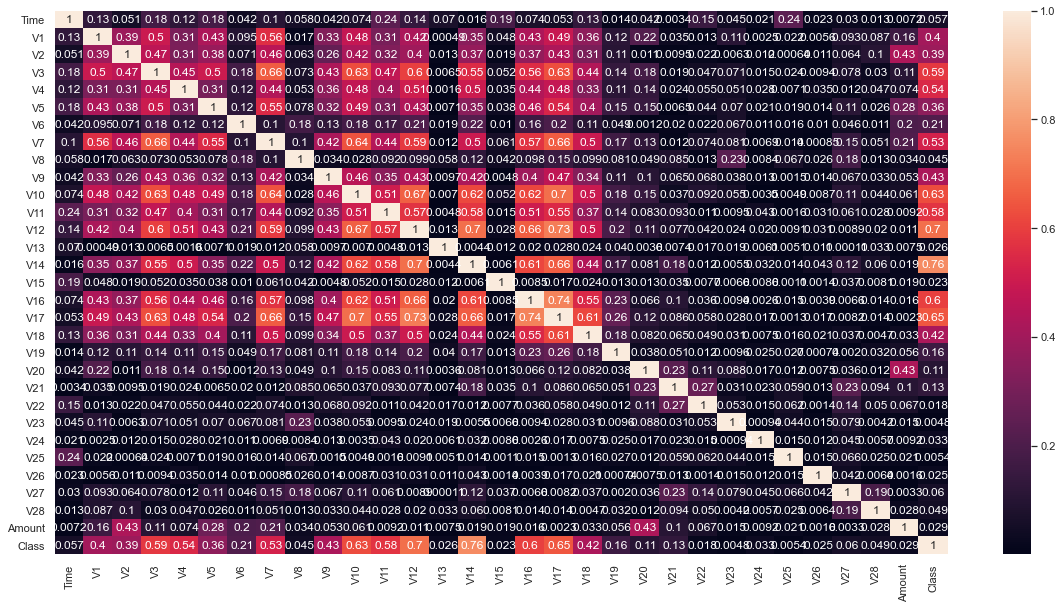

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(), annot=True)

Colores claros indican mayor correlacion. Vemos como 'V14' y 'V12' presenten valore mayores de 0.7. Tambien se observan correlaciones muy bajas con algunas variables que podrian ser eliminadas como 'V23', 'V25', 'V22',... con valores cercanos a 0. Vamos a ver como se correlacionan graficamente las variables de correlacion mayor a 0.7 mediante un pairplot

In [12]:
list_highly_corr_variables = ['V14', 'V12','Class']

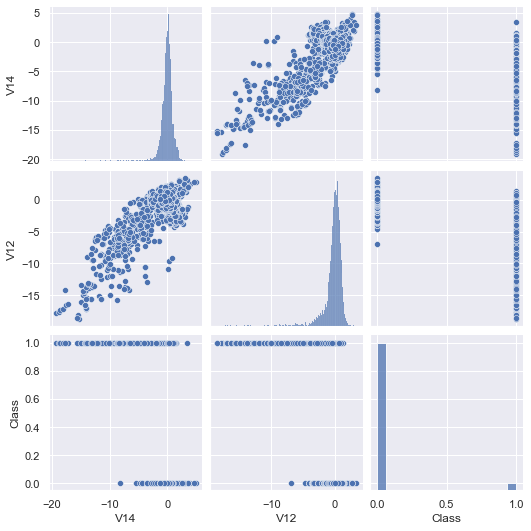

In [13]:
sns.pairplot(data=df[list_highly_corr_variables])

Se confirma que el problema de clasificacion es no balanceado. Las variables mas relevantes posseen muchos mas compoenentes de la clase no fraudulentos (0) que fraudulentos (1).
Ademas se observa que entre las variables 'V14' y 'V12' existe una relacion lineal creciente.

Vamos a eliminar atributos que no proporcionan informacion. Son aquellos que poseen una correlacion inferior a 0.5.

In [14]:
list_low_corr_variables = ['V2', 'V19', 'V21', 'V20', 'V27', 'V28', 'V8','Amount','V26','V22','V25','V23','V15','V13','V24','Time','V6','V5','V1','V18','V9']

In [15]:
train_set = df.drop(columns=list_low_corr_variables)

In [16]:
train_set.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
index,,,,,,,,,,
0,2.956914,2.813750,0.133702,1.034940,-0.532648,-0.189878,-0.939053,-0.129785,-0.174353,0
1,-0.497882,-3.151908,0.470283,-0.735586,0.208725,0.017131,-0.042677,-0.392648,-0.875960,0
2,1.739547,0.758588,0.196688,-0.730405,1.327101,1.005463,-0.090716,-1.635743,1.150431,0
3,0.509909,0.452332,-0.105404,0.053143,1.737927,1.253325,0.422534,0.197462,-0.407985,0
4,0.014599,-0.270793,-0.083890,0.846368,1.512576,0.858693,0.529565,-1.573951,0.024288,0


In [17]:
#Ver todas las componentes del train_set
my_np = train_set['Class'].to_numpy()
np.set_printoptions(threshold=np.inf)

print(my_np)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1
 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 

In [18]:
train_set.corr()['Class'].sort_values(ascending=False)

Class    1.000000
V11      0.575474
V4       0.544192
V7      -0.525895
V3      -0.585672
V16     -0.601573
V10     -0.628897
V17     -0.648046
V12     -0.697258
V14     -0.757890
Name: Class, dtype: float64

Vamos a generar el dataset de entrenamiento del modelo eliminando la variable objetivo 'Class'. Tambien hacemos el split de train y test para asegurarnos que no hay overfitting.

In [19]:
from sklearn.model_selection import train_test_split

train_df, test_df, train_target, test_target = train_test_split(train_set.drop("Class", axis=1),
                                                                train_set["Class"],
                                                                test_size=0.2, random_state=1234)

In [20]:
train_df.describe()

,V3,V4,V7,V10,V11,V12,V14,V16,V17
count,6619.000000,6619.000000,6619.000000,6619.000000,6619.000000,6619.000000,6619.000000,6619.000000,6619.000000
mean,-0.308333,0.206281,-0.247671,-0.249118,0.159761,-0.282437,-0.293172,-0.196592,-0.283394
std,2.497797,1.743493,2.175209,1.873701,1.367134,1.869475,1.904711,1.439933,2.169998
min,-30.558697,-5.020488,-43.557242,-24.588262,-2.985309,-18.683715,-18.822087,-13.256833,-25.162799
25%,-1.087956,-0.780607,-0.619530,-0.604092,-0.725520,-0.504075,-0.506814,-0.533293,-0.510383
50%,0.106906,0.060627,0.008546,-0.143367,0.010841,0.101843,0.016102,0.019637,-0.071938
75%,0.973415,0.882186,0.542928,0.414598,0.817424,0.585134,0.471724,0.499463,0.398599
max,4.187811,12.114672,26.237722,10.664992,11.669205,3.379534,4.873405,3.502924,6.609366


In [21]:
train_target

index
3382    0
1690    0
5147    0
5793    0
273     0
       ..
6137    0
664     0
7540    0
7221    0
1318    0
Name: Class, Length: 6619, dtype: int64

Aunque a primera vista no parece necesario (viendo lo valores maximos de los atributos de entrenamiento), resulta interesante realizar un escalado de las variables numericas utilizando el 'StandardScaler' de la libreria de sklearn.

In [22]:
X = np.array(train_df) #Convierto el dataframe a numpyarray

In [23]:
X

array([[ 1.17178319e+00,  2.78255164e+00, -3.77297866e-01,
         5.20701695e-01, -1.15420284e+00, -3.95157038e-01,
        -1.25329480e-01,  4.99317654e-01, -2.96757301e-01],
       [ 2.29639655e+00,  1.63810838e+00, -7.34906109e-01,
        -5.16964263e-01, -1.76849490e-01,  9.53787353e-01,
        -1.53956241e-01, -4.94864205e-01,  4.97431580e-01],
       [-5.47671916e-01,  4.30222129e-01,  9.43723806e-01,
         7.21581488e-01, -1.73587734e+00, -4.14185948e-01,
         3.67935570e-01, -2.58576221e+00,  2.42959262e-01],
       [-2.35178943e+00, -2.60436638e+00, -1.63563263e+00,
         1.59832524e+00, -2.19574455e-01, -7.22842596e-01,
        -2.07321616e-01, -7.09364815e-01,  4.35399485e-01],
       [-1.49001230e+00, -2.27050545e-01,  1.37580508e-01,
         1.02825696e+00,  6.67964808e-01, -2.62102743e+00,
         1.85994714e+00, -9.00979125e-02,  1.84641365e-01],
       [-1.84877937e+00,  3.87468733e-02, -1.27229784e+00,
        -7.12335521e-01,  5.09395245e-01,  8.232345

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X)

array([[ 5.92613562e-01,  1.47776032e+00, -5.95973806e-02,
         4.10886229e-01, -9.61180317e-01, -6.02996923e-02,
         8.81263167e-02,  4.83329403e-01, -6.15870609e-03],
       [ 1.04288972e+00,  8.21302553e-01, -2.24011591e-01,
        -1.42961018e-01, -2.46234360e-01,  6.61317931e-01,
         7.30957337e-02, -2.07159013e-01,  3.59854956e-01],
       [-9.58271623e-02,  1.28453599e-01,  5.47756447e-01,
         5.18104472e-01, -1.38668234e+00, -7.04792052e-02,
         3.47116886e-01, -1.65934891e+00,  2.42577634e-01],
       [-8.18165281e-01, -1.61219994e+00, -6.38130234e-01,
         9.86060573e-01, -2.77488196e-01, -2.35595038e-01,
         4.50760534e-02, -3.56135968e-01,  3.31266550e-01],
       [-4.73124303e-01, -2.48560944e-01,  1.77123453e-01,
         6.81790449e-01,  3.71757652e-01, -1.25102876e+00,
         1.13050287e+00,  7.39630309e-02,  2.15700971e-01],
       [-6.16768567e-01, -9.60983574e-02, -4.71083179e-01,
        -2.47239117e-01,  2.55762074e-01,  5.914787

In [25]:
df_train_final = pd.DataFrame(X) #Convierto X a dataframe llamado df_trainfinal que usare en los modelos

In [26]:
df_train_final.describe()

,0,1,2,3,4,5,6,7,8
count,6619.000000,6619.000000,6619.000000,6619.000000,6619.000000,6619.000000,6619.000000,6619.000000,6619.000000
mean,-0.308333,0.206281,-0.247671,-0.249118,0.159761,-0.282437,-0.293172,-0.196592,-0.283394
std,2.497797,1.743493,2.175209,1.873701,1.367134,1.869475,1.904711,1.439933,2.169998
min,-30.558697,-5.020488,-43.557242,-24.588262,-2.985309,-18.683715,-18.822087,-13.256833,-25.162799
25%,-1.087956,-0.780607,-0.619530,-0.604092,-0.725520,-0.504075,-0.506814,-0.533293,-0.510383
50%,0.106906,0.060627,0.008546,-0.143367,0.010841,0.101843,0.016102,0.019637,-0.071938
75%,0.973415,0.882186,0.542928,0.414598,0.817424,0.585134,0.471724,0.499463,0.398599
max,4.187811,12.114672,26.237722,10.664992,11.669205,3.379534,4.873405,3.502924,6.609366


Comparando el dataframe antes y despues del escalado, no parece tener ningun efecto en nuestro train set.

In [27]:
df_train_final = train_df

In [28]:
df_train_final.describe()

,V3,V4,V7,V10,V11,V12,V14,V16,V17
count,6619.000000,6619.000000,6619.000000,6619.000000,6619.000000,6619.000000,6619.000000,6619.000000,6619.000000
mean,-0.308333,0.206281,-0.247671,-0.249118,0.159761,-0.282437,-0.293172,-0.196592,-0.283394
std,2.497797,1.743493,2.175209,1.873701,1.367134,1.869475,1.904711,1.439933,2.169998
min,-30.558697,-5.020488,-43.557242,-24.588262,-2.985309,-18.683715,-18.822087,-13.256833,-25.162799
25%,-1.087956,-0.780607,-0.619530,-0.604092,-0.725520,-0.504075,-0.506814,-0.533293,-0.510383
50%,0.106906,0.060627,0.008546,-0.143367,0.010841,0.101843,0.016102,0.019637,-0.071938
75%,0.973415,0.882186,0.542928,0.414598,0.817424,0.585134,0.471724,0.499463,0.398599
max,4.187811,12.114672,26.237722,10.664992,11.669205,3.379534,4.873405,3.502924,6.609366


SELECCION DEL MODELO: Vemos que nuestro problema es de clasificacion, por lo que tendremos que buscar modelos que se ajusten a este problema, como puede ser un modelo de arboles de decision y ensembles (Random Forest).
Tambien podemos probar con el modelo de regresion logistica que, aunque no es un clasificador, puede utilizarse como tal mediante un valor de "corte" para la probabilidad que clasifique las entradas con probabilidad mayor de ese corte como de una clase, y por debajo del corte como de otra clase.

Otro aspecto que tenemos que definir antes de empezar es la metrica que queremos usar para evaluar la bondad de nuestro modelo. 
Otro aspecto importante es como vamos a evaluar el modelo en training (el test-set o hold-out no lo vamos a usar hasta el final). Para ello siempre es una buena opcion usar cross-validation.

In [29]:
#Importo librerias para entrenar modelo Decision Tree 
from sklearn import tree

In [30]:
#Entreno el arbol de decision como clasificador con mi dataset usando como hiperparametro una profundidad maxima de 3
tree_clf = tree.DecisionTreeClassifier(max_depth=3).fit(df_train_final, train_target)

Vamos a ajustar los hiperparametros del arbol de decision para aumentar o disminuir su "flexibilidad" a la hora de adaptarse a los datos y seleccionar el mejor a partir del resultado de la validación cruzada.
Sklearn nos da una herramienta muy útil para tal propósito, GridSearchCV. Esta herramienta evaluará el modelo con cada una de las combinaciones de hiper-parametros utilizando la técnica del cross validation.

Vamos a utilizar la funcion del GridSearch de la libreria sklearn para "tunear" el modelo buscando los hiperparametros de clasificacion optimos. Como scoring voy a utilizar  la metrica F1-score que combina la precision y el recall y que nos servira tambien para comparar clasificadores

Empezamos con el modelo DecisionTreeClassifier como base de comparacion

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'max_depth': range(1, 10),
         'min_samples_split': range(2,10,2),
          'min_samples_leaf': range(2,20,2)}

classif_DT = DecisionTreeClassifier()
gs_classif_DT = GridSearchCV(estimator=classif_DT, param_grid=params, cv=5, scoring='f1')

gs_classif_DT.fit(df_train_final, train_target)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(2, 20, 2),
                         'min_samples_split': range(2, 10, 2)},
             scoring='f1')

In [32]:
print(gs_classif_DT.best_params_)

{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 6}


Tras el GridSearch, los mejores hiperparametros son los calculados. Entrenamos el modelo con los hiperparametros optimos

In [33]:
# importa el modulo de StratifiedKfold
from sklearn.model_selection import StratifiedKFold

# importa el modulo de cross_val_predict
from sklearn.model_selection import cross_val_predict

# usa el StratifiedKFold para dividir el train set en 5 partes. Usa el random_state = 1234
kfold = StratifiedKFold(n_splits=5, random_state=1234, shuffle=True)

classif_DT_Opt = DecisionTreeClassifier(max_depth=gs_classif_DT.best_params_['max_depth'], min_samples_leaf=gs_classif_DT.best_params_['min_samples_leaf'], min_samples_split=gs_classif_DT.best_params_['min_samples_split'])
y_pred_DT_Opt = cross_val_predict(classif_DT_Opt, df_train_final, train_target, cv=kfold)

In [34]:
y_pred_DT_Opt.shape

(6619,)

In [35]:
train_target.shape

(6619,)

Vemos las metricas asociadas a problemas de clasificacion: Matriz de confusion, Accuracy, Precision, Recall y F1

In [36]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(train_target, y_pred_DT_Opt, labels=[1, 0]))

[[ 259   47]
 [  14 6299]]


En total tenemos 253+6303+53+10=6619 muestras sobre las que hemos realizado predicciones.
De las 6619, 253+10=263 son observaciones positivas (fraudes) y 53+6303=6353 son observaciones negativas (honestos)
De los 263 clientes fraudulentos, hemos predicho bien la categoria en 253 casos y mal en 10 casos
De los 6353 clientes honestos, hemos predicho bien la categoria en 6303 casos y mal en 53

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(train_target, y_pred_DT_Opt))
print("Precision:", precision_score(train_target, y_pred_DT_Opt))
print("Recall:", recall_score(train_target, y_pred_DT_Opt))
print("F1:", f1_score(train_target, y_pred_DT_Opt))

Accuracy: 0.9907841063604774
Precision: 0.9487179487179487
Recall: 0.8464052287581699
F1: 0.8946459412780657


Tenemos un accuracy muy alto (casi 1), pero en realidad este parametro no me dice mucho, tan solo que estoy prediciendo bien la clase negativa (clientes honestos).
Lo que mas me ineteresa es el F1 y el Recall. F1 esta entorno al 0.9 lo cual es bueno pues recoge la influencia de ambos parametros (Precision y Recall).

In [38]:
from sklearn.metrics import classification_report
print(classification_report(train_target, y_pred_DT_Opt))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6313
           1       0.95      0.85      0.89       306

    accuracy                           0.99      6619
   macro avg       0.97      0.92      0.94      6619
weighted avg       0.99      0.99      0.99      6619



Nuestro problema es desbalanceado. Por tanto usaremos la curva PR para analizarlo.

In [39]:
y_proba_DT_Opt = cross_val_predict(classif_DT_Opt, df_train_final, train_target, cv=kfold, method='predict_proba')

[]

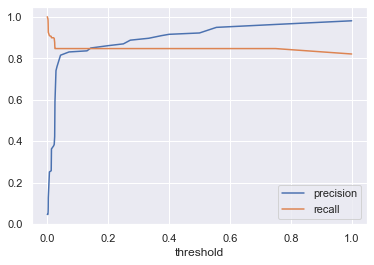

In [40]:
from sklearn.metrics import precision_recall_curve

# calcula la precision, el recall y los umbrales
prec, rec, thre = precision_recall_curve(y_true=train_target, probas_pred=y_proba_DT_Opt[:,1])

# haz un plot de la precision y el recall en función de los umbrales
plt.plot(thre, prec[:-1], label='precision')
plt.plot(thre, rec[:-1], label='recall')
plt.legend(loc='best')
plt.xlabel('threshold')
plt.plot()

Tenemos un 'Recall' alto (cercano a 1) lo que implica alta sensibilidad a la deteccion de fraude. Lo cual es bueno ya que aunque nos podemos equivocar, lo detectamos facilmente. Ademas tampoco nos equivocamos frecuentemente ya que la precision tambien es alta a partir de un umbral bajo. 
El umbral optimo (maximo F1 score) se encuentra en el punto de corte de ambas curvas

Text(0.5, 1.0, 'Precision-Recall curve')

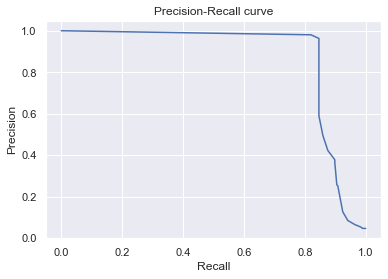

In [41]:
# plotea la precisión en funcion del recall
plt.plot(rec, prec)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')

La curva PR posee un area bajo la curva cercana a 1, lo cual es bueno 

A continuacion vamos a calcular la PR-AUC util para problemas desbalanceados como el nuestro. A mayor PR-AUC valor, mejor sera nuestro modelo

In [42]:
from sklearn.metrics import auc

prec, rec, thre = precision_recall_curve(y_true=train_target, probas_pred= y_proba_DT_Opt[:,1])
auc_pr = auc(rec, prec)

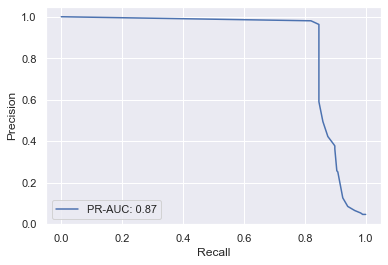

In [43]:
plt.plot(rec, prec, label='PR-AUC: {a}'.format(a=round(auc_pr, 2)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')

A continuacion vamos a realizar el mismo proceso pero empleando como modelo un ensemble como Random Forest. Buscamos los hiperparametros optimos.

In [44]:
from sklearn import ensemble

params = {'n_estimators': [200,500],
          'max_features': ['auto','sqrt','log2'],
          'max_depth': [4,5,6,7,8]
         }

classif_RF = ensemble.RandomForestClassifier()
gs_classif_RF = GridSearchCV(estimator=classif_RF, param_grid=params, cv=5, scoring='f1')

gs_classif_RF.fit(df_train_final, train_target)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             scoring='f1')

In [45]:
print(gs_classif_RF.best_params_)

{'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}


In [46]:
# Entrenamos el modelo con los hiperparametros optimos
classif_RF_Opt = ensemble.RandomForestClassifier(max_depth=gs_classif_RF.best_params_['max_depth'], max_features=gs_classif_RF.best_params_['max_features'], n_estimators=gs_classif_RF.best_params_['n_estimators'])
y_pred_RF_Opt = cross_val_predict(classif_RF_Opt, df_train_final, train_target, cv=kfold)

In [47]:
y_pred_DT_Opt.shape

(6619,)

In [48]:
#Matriz de confusion
print(confusion_matrix(train_target, y_pred_RF_Opt, labels=[1, 0]))

[[ 257   49]
 [   1 6312]]


In [49]:
print("Accuracy:", accuracy_score(train_target, y_pred_RF_Opt))
print("Precision:", precision_score(train_target, y_pred_RF_Opt))
print("Recall:", recall_score(train_target, y_pred_RF_Opt))
print("F1:", f1_score(train_target, y_pred_RF_Opt))

Accuracy: 0.9924459888200634
Precision: 0.9961240310077519
Recall: 0.8398692810457516
F1: 0.9113475177304965


In [50]:
print(classification_report(train_target, y_pred_RF_Opt))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6313
           1       1.00      0.84      0.91       306

    accuracy                           0.99      6619
   macro avg       0.99      0.92      0.95      6619
weighted avg       0.99      0.99      0.99      6619



Vemos que los resultados son muy similares al DT. Algo mejores al acercarse mas a 1 la F1

In [51]:
#Curva PR
y_proba_RF_Opt = cross_val_predict(classif_RF_Opt, df_train_final, train_target, cv=kfold, method='predict_proba')

[]

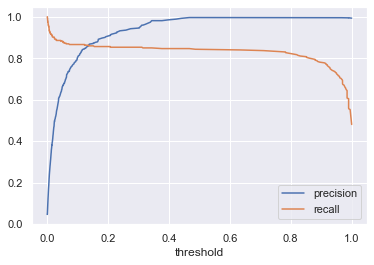

In [52]:
# calcula la precision, el recall y los umbrales
prec, rec, thre = precision_recall_curve(y_true=train_target, probas_pred=y_proba_RF_Opt[:,1])

# haz un plot de la precision y el recall en función de los umbrales
plt.plot(thre, prec[:-1], label='precision')
plt.plot(thre, rec[:-1], label='recall')
plt.legend(loc='best')
plt.xlabel('threshold')
plt.plot()

Resultados similares a DT, aunque las curvas son mas 'suaves'. Tenemos un 'Recall' alto (cercano a 1) lo que implica alta sensibilidad a la deteccion de fraude. Lo cual es bueno ya que aunque nos podemos equivocar, lo detectamos facilmente. Ademas tampoco nos equivocamos frecuentemente ya que la precision tambien es alta a partir de un umbral bajo. 

Text(0.5, 1.0, 'Precision-Recall curve')

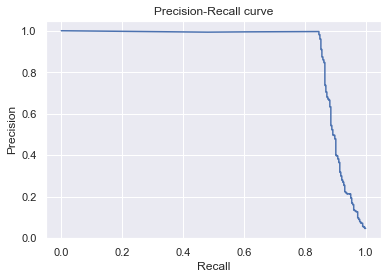

In [53]:
# plotea la precisión en funcion del recall
plt.plot(rec, prec)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')

La curva PR es ligeramente mas 'abrupta' (caida de la precision frente al recall) que en DT, aunque tambien posee un area cercana a 1, lo cual es bueno: alta precision y recall. 

In [54]:
prec, rec, thre = precision_recall_curve(y_true=train_target, probas_pred= y_proba_RF_Opt[:,1])
auc_pr = auc(rec, prec)

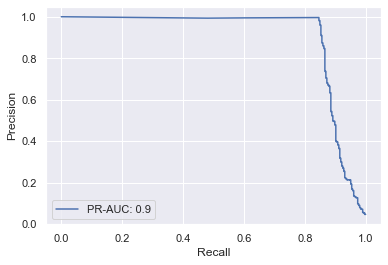

In [55]:
plt.plot(rec, prec, label='PR-AUC: {a}'.format(a=round(auc_pr, 2)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')

Vemos como mejora el PR-AUC con respecto a DT

A continuacion vamos a realizar el mismo proceso pero empleando como modelo la Regresion Logistica. Buscamos los hiperparametros optimos.

In [56]:
from sklearn.linear_model import LogisticRegression

params = {"C": np.logspace(-3,3,7), 
          "penalty": ['l2']} # solo soporta l2 ridge}


classif_LR = LogisticRegression()
gs_classif_LR = GridSearchCV(estimator=classif_LR, param_grid=params, cv=5, scoring='f1')

gs_classif_LR.fit(df_train_final, train_target)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l2']},
             scoring='f1')

In [57]:
print(gs_classif_LR.best_params_)

{'C': 1.0, 'penalty': 'l2'}


In [58]:
# Entrenamos el modelo con los hiperparametros optimos
classif_LR_Opt = LogisticRegression(C=gs_classif_LR.best_params_['C'], penalty=gs_classif_LR.best_params_['penalty'])
y_pred_LR_Opt = cross_val_predict(classif_LR_Opt, df_train_final, train_target, cv=kfold)

In [59]:
y_pred_LR_Opt.shape

(6619,)

In [60]:
#Matriz de confusion
print(confusion_matrix(train_target, y_pred_LR_Opt, labels=[1, 0]))

[[ 258   48]
 [   3 6310]]


In [61]:
print("Accuracy:", accuracy_score(train_target, y_pred_LR_Opt))
print("Precision:", precision_score(train_target, y_pred_LR_Opt))
print("Recall:", recall_score(train_target, y_pred_LR_Opt))
print("F1:", f1_score(train_target, y_pred_LR_Opt))

Accuracy: 0.9922949085964647
Precision: 0.9885057471264368
Recall: 0.8431372549019608
F1: 0.91005291005291


In [62]:
print(classification_report(train_target, y_pred_LR_Opt))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6313
           1       0.99      0.84      0.91       306

    accuracy                           0.99      6619
   macro avg       0.99      0.92      0.95      6619
weighted avg       0.99      0.99      0.99      6619



Vemos que los resultados son muy similares al RF. F1 de 0.9

In [63]:
#Curva PR
y_proba_LR_Opt = cross_val_predict(classif_LR_Opt, df_train_final, train_target, cv=kfold, method='predict_proba')

[]

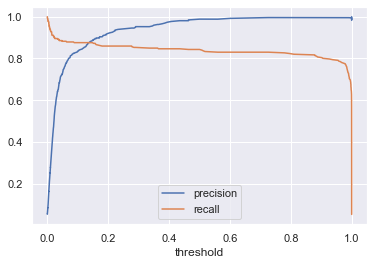

In [64]:
# calcula la precision, el recall y los umbrales
prec, rec, thre = precision_recall_curve(y_true=train_target, probas_pred=y_proba_LR_Opt[:,1])

# haz un plot de la precision y el recall en función de los umbrales
plt.plot(thre, prec[:-1], label='precision')
plt.plot(thre, rec[:-1], label='recall')
plt.legend(loc='best')
plt.xlabel('threshold')
plt.plot()

Resultados similares a RF. Tenemos un 'Recall' alto (cercano a 1) lo que implica alta sensibilidad a la deteccion de fraude. Lo cual es bueno ya que aunque nos podemos equivocar, lo detectamos facilmente. Ademas tampoco nos equivocamos frecuentemente ya que la precision tambien es alta a partir de un umbral bajo. 

Text(0.5, 1.0, 'Precision-Recall curve')

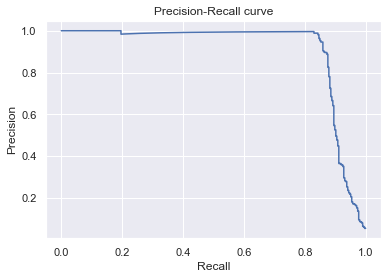

In [65]:
# plotea la precisión en funcion del recall
plt.plot(rec, prec)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')

La curva PR es muy similar a RF y tambien posee un area cercana a 1, lo cual es bueno: alta precision y recall. 

In [66]:
prec, rec, thre = precision_recall_curve(y_true=train_target, probas_pred= y_proba_LR_Opt[:,1])
auc_pr = auc(rec, prec)

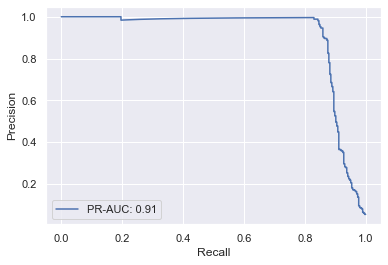

In [67]:
plt.plot(rec, prec, label='PR-AUC: {a}'.format(a=round(auc_pr, 2)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')

Vemos como mejora el PR-AUC con respecto a DT y es muy similar a RF

A continuacion podemos evaluar la importancia de las variables en los tres modelos de clasificacion. Esto es muy importante de cara a la explicabilidad del modelo. Especialmente en nuestro caso debemos ser capaces de justificar el por que el modelo decide que un cliente es fraudulento u honesto.
Hay dos formas de ver esto, una es mediante el atributo de cada modelo llamado 'feature_importances_' y el otro metodo es mediante el uso de 'SHAP values'

Vamos primero a verlo con el atributo 'feature_importances'

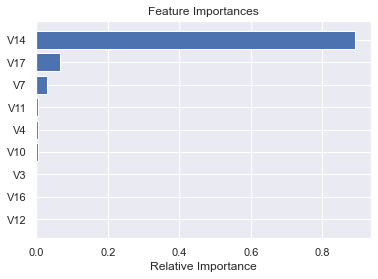

In [68]:
#DECISION TREE
importances = classif_DT_Opt.fit(df_train_final, train_target).feature_importances_
indices = np.argsort(importances)

features = df_train_final.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

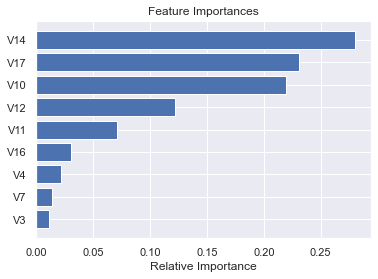

In [69]:
#RANDOM FOREST
importances = classif_RF_Opt.fit(df_train_final, train_target).feature_importances_
indices = np.argsort(importances)

features = df_train_final.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#LOGISTIC REGRESSION
Para regresion logistica no existe el atributo de 'feature_importances'

Vemos como en RANDOM FOREST aparece una explicacion de la importancia de las variables para el modelo. La variable V14 es la de mayor importancia, seguida de 'V17' y del resto de forma practicamente escalonada.
En el caso de DECISION TREE, tan solo resultan relevantes para el modelo las variables 'V14' y 'V17'. El resto parece que no tienen importancia o impacto sobre el modelo.

Vamos a evaluar en los tres modelos (DT, RF y LR), a partir del conjunto de test y las predicciones como se han comportado

In [70]:
from sklearn.metrics import classification_report

#Prediccion sobre el conjunto de test de DECISION TREE
pred_DT = classif_DT_Opt.predict(test_df)
#Prediccion sobre el conjunto de test de RANDOM FOREST
pred_RF = classif_RF_Opt.predict(test_df)
#Prediccion sobre el conjunto de test de LOGISTIC REGRESSION
classif_LR_Opt.fit(df_train_final, train_target)
pred_LR = classif_LR_Opt.predict(test_df)

#Visualizacion de informes
target_names = ['Honesto', 'Fraude']
print(classification_report(test_target,pred_DT,target_names=target_names))
print(classification_report(test_target,pred_RF,target_names=target_names))
print(classification_report(test_target,pred_LR,target_names=target_names))

              precision    recall  f1-score   support

     Honesto       0.99      1.00      0.99      1567
      Fraude       0.95      0.83      0.88        88

    accuracy                           0.99      1655
   macro avg       0.97      0.91      0.94      1655
weighted avg       0.99      0.99      0.99      1655

              precision    recall  f1-score   support

     Honesto       0.99      1.00      0.99      1567
      Fraude       0.99      0.83      0.90        88

    accuracy                           0.99      1655
   macro avg       0.99      0.91      0.95      1655
weighted avg       0.99      0.99      0.99      1655

              precision    recall  f1-score   support

     Honesto       0.99      1.00      0.99      1567
      Fraude       0.97      0.83      0.90        88

    accuracy                           0.99      1655
   macro avg       0.98      0.91      0.95      1655
weighted avg       0.99      0.99      0.99      1655



Se observa sobre el conjunto de test que nuestros modelos obtienen buenas preddiciones especialmente en el caso e Random Forest y Regresion logistica

A continuacion vamos a aplicar SHAP al modelo RANDOM FOREST que consideraremos como 'ganador'

/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

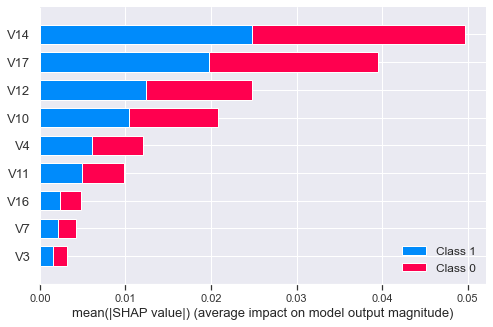

In [71]:
import shap

shap_values = shap.TreeExplainer(classif_RF_Opt).shap_values(df_train_final)
shap.summary_plot(shap_values, df_train_final, plot_type="bar")

Observamos valores 'similares' pero a diferencia del 'feature importances' tambien nos aparece en colores las clases de clientes honestos y fraudulentos. 
Se observa la 'direccionalidad' en cada atributo o el impacto de cada atributo sobre el modelo. Valores altos de 'V14'  hacen que los clientes tiendan a ser fraudulentos. Para el resto de atributos sucede algo similar, aunque la variable mas relevante es 'V14' seguida de 'V17', etc.

A continuacion vamos a aplicar nuestro modelo 'ganador' RANDOM FOREST sobre el conjunto de test

In [72]:
#Leo fichero 'actividad_dos_test.csv' y lo vuelco sobre un dataframe de pandas
df_test_datathon = pd.read_csv('actividad_dos_test.csv')

In [73]:
df_test_datathon.head()

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,312.0,-0.987858,0.475771,1.672622,1.178044,0.730282,-0.403391,0.308014,0.254682,...,0.392656,-0.319192,-1.132128,0.233566,0.140309,0.072813,-0.637665,0.231877,0.062719,33.26
1,1,466.0,-1.064559,0.432452,0.128327,-2.019741,0.014434,-0.487552,0.293956,0.087702,...,0.398423,0.112732,0.667153,-0.092997,-0.533060,0.003726,-0.271817,0.689156,0.480554,20.00
2,2,483.0,-0.792724,0.946688,2.245149,1.167398,-0.625405,-0.449979,0.157625,0.015379,...,0.114467,0.223032,0.926665,-0.170298,0.972432,-0.115298,-0.229900,0.156610,0.252310,4.42
3,3,742.0,-1.638212,0.395044,1.487210,-0.536682,1.691993,-0.610509,0.479928,-0.209453,...,-0.118687,-0.405072,-0.800599,-0.501077,-0.654136,0.249438,0.058013,-0.026457,-0.112420,11.98
4,4,945.0,0.904759,-0.518302,0.398305,0.495653,-0.834514,-0.642216,0.044820,-0.043259,...,0.175592,-0.096473,-0.576288,-0.051439,0.572083,0.192744,0.400686,-0.079651,0.027963,158.00


In [74]:
df_test_datathon.set_index('index', inplace=True) #Establezco como indice la columna 'index'

In [75]:
df_test_datathon.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
index,,,,,,,,,,,,,,,,,,,,,
0,312.0,-0.987858,0.475771,1.672622,1.178044,0.730282,-0.403391,0.308014,0.254682,-1.045606,...,0.392656,-0.319192,-1.132128,0.233566,0.140309,0.072813,-0.637665,0.231877,0.062719,33.26
1,466.0,-1.064559,0.432452,0.128327,-2.019741,0.014434,-0.487552,0.293956,0.087702,-0.473573,...,0.398423,0.112732,0.667153,-0.092997,-0.533060,0.003726,-0.271817,0.689156,0.480554,20.00
2,483.0,-0.792724,0.946688,2.245149,1.167398,-0.625405,-0.449979,0.157625,0.015379,0.269781,...,0.114467,0.223032,0.926665,-0.170298,0.972432,-0.115298,-0.229900,0.156610,0.252310,4.42
3,742.0,-1.638212,0.395044,1.487210,-0.536682,1.691993,-0.610509,0.479928,-0.209453,-0.161525,...,-0.118687,-0.405072,-0.800599,-0.501077,-0.654136,0.249438,0.058013,-0.026457,-0.112420,11.98
4,945.0,0.904759,-0.518302,0.398305,0.495653,-0.834514,-0.642216,0.044820,-0.043259,0.223597,...,0.175592,-0.096473,-0.576288,-0.051439,0.572083,0.192744,0.400686,-0.079651,0.027963,158.00


In [76]:
test_set_datathon = df_test_datathon.drop(columns=list_low_corr_variables) #Me quedo con las variables relevantes

In [77]:
test_set_datathon.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17
index,,,,,,,,,
0,1.672622,1.178044,0.308014,0.155401,1.793725,0.702015,0.685310,-0.447056,0.096462
1,0.128327,-2.019741,0.293956,1.350467,0.014346,-0.920272,-0.203151,1.137245,-0.224755
2,2.245149,1.167398,0.157625,-0.021304,-0.375567,0.478018,-0.473544,-0.680594,0.223911
3,1.487210,-0.536682,0.479928,-0.358540,-0.468911,0.046148,-0.882591,0.432647,-0.360270
4,0.398305,0.495653,0.044820,-0.119216,1.299905,0.849929,0.411388,0.082616,-0.214906


In [78]:
pred_datathon = classif_RF_Opt.predict(test_set_datathon) #Realizo la prediccion con mi modelo entrenado

In [79]:
pred_datathon

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Escribo el resultado de la predicion en un fichero

In [80]:
df_pred_datathon = pd.DataFrame(pred_datathon, columns = ['Prediccion'])

In [81]:
df_pred_datathon

,Prediccion
0,0
1,0
2,0
3,0
4,0
...,...
2053,0
2054,0
2055,0
2056,0


In [82]:
#Leo fichero 'actividad_dos_test.csv' y lo vuelco sobre un dataframe de pandas
df_test_prediccion = pd.read_csv('actividad_dos_test.csv')

In [83]:
#Anyado una columna con mi prediccion
df_test_prediccion['Prediccion']=df_pred_datathon

In [84]:
df_test_prediccion.to_csv('ManuelZaeraSanzPred.csv', index=False)